In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
from LoadMultiFiles import LoadMultiFilesDataframe
v_L_LS = ["0.5", "1.0", "2", "5", "7", "10"]
# v_particles = ["H_2",   "C_12",  "Ne_20"]
v_particles = ["H_2"]
v_L_LS_float = np.array(v_L_LS, dtype=np.float)
df_time = pd.DataFrame()
for particle in v_particles:
    for L_LS in v_L_LS:
        # if L_LS == "2":
        #     df_tmp = LoadMultiFilesDataframe(f"/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/pkl/PMT_far_{particle}_*.pkl")
        # else:
        #     df_tmp = LoadMultiFilesDataframe(f"/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/pkl_diff_L_LS/PMT_far_{particle}_*_LS_{L_LS}mm.pkl")
        df_tmp = LoadMultiFilesDataframe(f"/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/pkl_diff_L_LS/PMT_far_{particle}_*_LS_{L_LS}mm.pkl")
        df_tmp["L_LS"] = float(L_LS)
        df_time = pd.concat( (df_time, df_tmp))

/tmp/ipykernel_14249/3417983006.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v_L_LS_float = np.array(v_L_LS, dtype=np.float)
100%|█████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.19s/it]


In [11]:
from importlib import reload
import GlobalFunction
reload(GlobalFunction)
from GlobalFunction import GlobalVal
from GlobalFunction import tag_parentType
bins_time_profile = GlobalVal.bins_time_profile

In [4]:
from GlobalFunction import PreprocessThetaAndBeamXZ
df_time, dict_replace_chamberID = PreprocessThetaAndBeamXZ(df_time)

In [5]:
df_time

,index,ion,time,chamberID,BeamX,BeamZ,Ek,dE_quench,dE/dx,parentPDGID,parent_dEdx,theta,isCherenkov,L_LS,dE_deposit,mean_theta,mean_theta_int,bin_BeamX,bin_BeamZ
0,0,H_2,7.009905,2,12.060942,-13.050772,0.000003,0.189140,0.396121,1000010020,0.223084,59.283633,0,0.5,NaN,60 deg,60,"(5.0, 15.0]","(-15.0, -5.0]"
1,1,H_2,17.117036,3,12.060942,-13.050772,0.000003,0.189140,0.396121,11,1.006687,46.008134,0,0.5,NaN,45 deg,45,"(5.0, 15.0]","(-15.0, -5.0]"
2,2,H_2,5.616812,11,12.060942,-13.050772,0.000003,0.189140,0.396121,11,1.006687,74.924593,0,0.5,NaN,75 deg,75,"(5.0, 15.0]","(-15.0, -5.0]"
3,3,H_2,4.231149,6,21.588073,5.327992,0.000003,0.271014,0.560941,11,0.259161,1.129394,0,0.5,NaN,1 deg,1,"(15.0, 25.0]","(5.0, 15.0]"
4,4,H_2,7.262014,6,21.588073,5.327992,0.000003,0.271014,0.560941,11,0.259161,0.015639,0,0.5,NaN,1 deg,1,"(15.0, 25.0]","(5.0, 15.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916867,2616947,H_2,24.862499,5,12.068428,-20.372888,0.000003,3.312085,0.342781,1000010020,0.496134,13.574282,0,10.0,NaN,15 deg,15,"(5.0, 15.0]","(-25.0, -15.0]"
5916868,2616948,H_2,10.259707,10,12.068428,-20.372888,0.000003,3.312085,0.342781,1000010020,0.496134,60.648711,0,10.0,NaN,60 deg,60,"(5.0, 15.0]","(-25.0, -15.0]"
5916869,2616949,H_2,5.487444,0,12.068428,-20.372888,0.000003,3.312085,0.342781,11,2.962684,90.786668,0,10.0,NaN,90 deg,90,"(5.0, 15.0]","(-25.0, -15.0]"
5916870,2616950,H_2,21.065113,10,12.068428,-20.372888,0.000003,3.312085,0.342781,1000010020,0.496134,60.419733,0,10.0,NaN,60 deg,60,"(5.0, 15.0]","(-25.0, -15.0]"


/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:156: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = np.sqrt( (hist_base**2*h_error**2 + h[0]**2*hist_base_error**2)/hist_base**4 )
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:157: RuntimeWarning: invalid value encountered in true_divide
  ax1.errorbar(bin_center, (h[0]-hist_base)/hist_base,xerr=np.diff(h[1])/2,yerr=ratio_error,color=color,
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:156: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = np.sqrt( (hist_base**2*h_error**2 + h[0]**2*hist_base_error**2)/hist_base**4 )
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:157: RuntimeWarning: invalid value encountered in true_divide
  ax1.errorbar(bin_center, (h[0]-hist_base)/hist_base,xerr=np.diff(h[1])/2,yerr=ratio_error,color=color,
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:156: RuntimeWarni

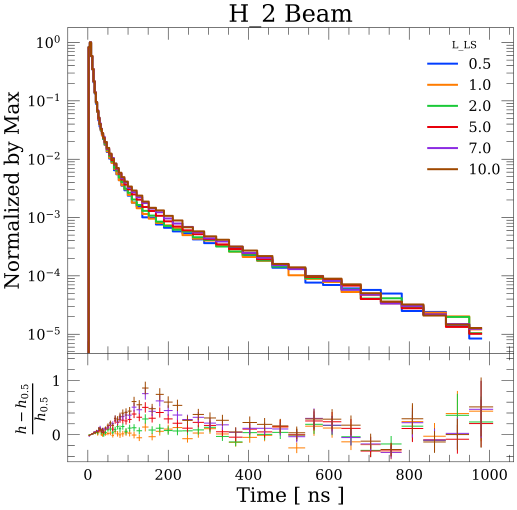

In [6]:
from HistTools import DfHistPlotNormByMax, PlotHistNormByMax
# ax0, ax1 = DfHistPlotNormByMax( data=df_time[(df_time["mean_theta"]=="15 deg") & (df_time["parentPDGID"]==1000010020)], x="time", hue="L_LS",
#                      bins=bins_time_profile,divide_binWidth=True)
for particle in v_particles:
    ax0, ax1 = DfHistPlotNormByMax( data=df_time[(df_time["mean_theta"]=="15 deg") & (df_time["ion"]==particle)], x="time", hue="L_LS",
                                bins=bins_time_profile,divide_binWidth=True)
    ax1.set_xlabel("Time [ ns ]")
    ax0.set_title(f"{particle} Beam")
    ax1.set_ylim(-0.5, 1.5)
    ax0.semilogy()
    ax0.set_ylabel("Normalized by Max")


/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:156: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = np.sqrt( (hist_base**2*h_error**2 + h[0]**2*hist_base_error**2)/hist_base**4 )
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:157: RuntimeWarning: invalid value encountered in true_divide
  ax1.errorbar(bin_center, (h[0]-hist_base)/hist_base,xerr=np.diff(h[1])/2,yerr=ratio_error,color=color,
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:156: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = np.sqrt( (hist_base**2*h_error**2 + h[0]**2*hist_base_error**2)/hist_base**4 )
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:157: RuntimeWarning: invalid value encountered in true_divide
  ax1.errorbar(bin_center, (h[0]-hist_base)/hist_base,xerr=np.diff(h[1])/2,yerr=ratio_error,color=color,
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:156: RuntimeWarni

Text(0, 0.5, 'Normalized by Max')

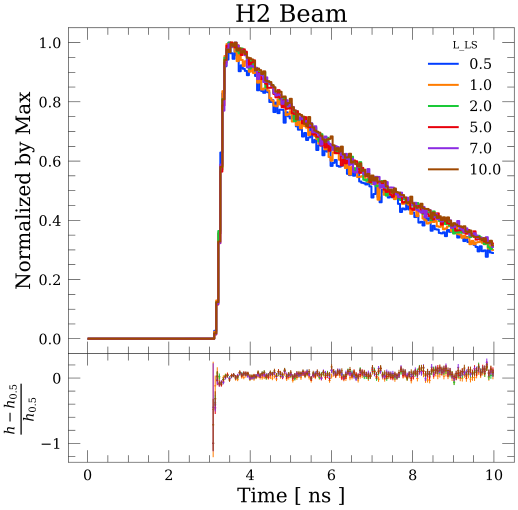

In [10]:
ax0, ax1 = DfHistPlotNormByMax( data=df_time[(df_time["mean_theta_int"]==75)&(df_time["ion"]=="H_2")], x="time", hue="L_LS",
                     bins=np.linspace(0, 10,200),divide_binWidth=True)
ax1.set_xlabel("Time [ ns ]")
ax0.set_title("H2 Beam")
ax0.set_ylabel("Normalized by Max")

/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:156: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = np.sqrt( (hist_base**2*h_error**2 + h[0]**2*hist_base_error**2)/hist_base**4 )
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:157: RuntimeWarning: divide by zero encountered in true_divide
  ax1.errorbar(bin_center, (h[0]-hist_base)/hist_base,xerr=np.diff(h[1])/2,yerr=ratio_error,color=color,
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:157: RuntimeWarning: invalid value encountered in true_divide
  ax1.errorbar(bin_center, (h[0]-hist_base)/hist_base,xerr=np.diff(h[1])/2,yerr=ratio_error,color=color,
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:156: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = np.sqrt( (hist_base**2*h_error**2 + h[0]**2*hist_base_error**2)/hist_base**4 )
/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/HistTools.py:157: RuntimeWarn

Text(0, 0.5, 'Normalized by Max')

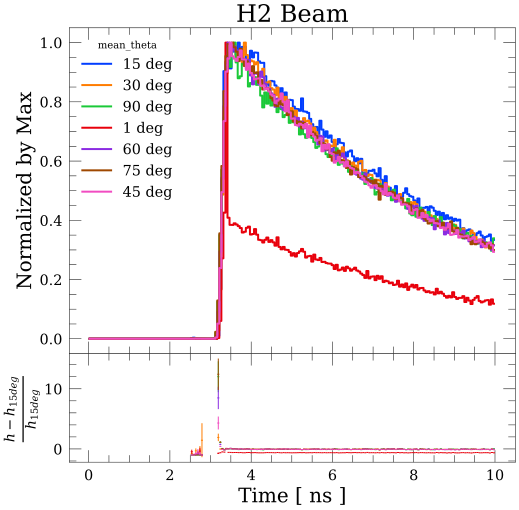

In [8]:
ax0, ax1 = DfHistPlotNormByMax( data=df_time[(df_time["L_LS"]==1)&(df_time["ion"]=="H_2")], x="time", hue="mean_theta",
                     bins=np.linspace(0, 10,200),divide_binWidth=True)
ax1.set_xlabel("Time [ ns ]")
ax0.set_title("H2 Beam")
ax0.set_ylabel("Normalized by Max")

In [9]:
df_oneIon = df_time[(df_time["L_LS"]==1)&(df_time["ion"]=="H_2")&(df_time["mean_theta_int"]==1)]
df_oneIon["parentType"] = df_oneIon["parentPDGID"].apply(lambda pdgID: tag_parentType(pdgID, pdgID_main_track))
sns.histplot( data=df_oneIon, x="time", hue="isCherenkov",
              multiple="stack", bins=np.linspace(0, 10,200))
plt.xlabel("Time [ ns ]")
plt.title(r"H2 Beam ( L_LS=1mm & $\theta$=0)")

NameError: name 'tag_parentType' is not defined

In [ ]:
from GetPhysicsProperty import NameToPDGID
from copy import copy
dict_df_daughter_contribution = {}
for particle in v_particles:
    df_daughter_contribution = pd.DataFrame()
    for L_LS in v_L_LS_float:
        pdgID_main_track = NameToPDGID(particle)
        df_oneIon = df_time[(df_time["ion"]==particle)&(df_time["mean_theta"]=="15 deg")&(df_time["L_LS"]==L_LS)]
        df_oneIon["parentType"] = df_oneIon["parentPDGID"].apply(lambda pdgID: tag_parentType(pdgID, pdgID_main_track))
        count = df_oneIon.value_counts("parentType", normalize=True)
        df_daughter_contribution = pd.concat((df_daughter_contribution, count), axis=1).rename(columns={0:L_LS })
        del df_oneIon
    display(df_daughter_contribution.fillna(0))
    break
    df_daughter_contribution.fillna(0)
    dict_df_daughter_contribution[particle] = copy(df_daughter_contribution)

In [ ]:
f, axes = plt.subplots(1, len(v_particles),sharey=True, figsize=(24,8))
plt.subplots_adjust(wspace=0, hspace=0)
for i, (particle,df_daughter_contribution) in enumerate(dict_df_daughter_contribution.items()):
    df_daughter_contribution.T.plot(use_index=True, kind='bar', stacked=False,rot=45, ax=axes[i],
                                    legend=False)
    axes[i].set_title(f"{particle} Beam")
    axes[i].set_xlabel("Length of LS [ mm ]")
axes[0].set_ylabel("Percentage of Photon Source")
axes[-1].legend(bbox_to_anchor=(1,1))

In [ ]:
dict_df_daughter_contribution["H_2"].fillna(0)